# Basic image classification

## Michał Gromadzki

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
tf.random.set_seed(1337)
random.seed(1337)

In [49]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [50]:
train_images.shape

(60000, 28, 28)

In [51]:
train_labels.shape

(60000,)

In [52]:
test_images.shape

(10000, 28, 28)

In [53]:
test_labels.shape

(10000,)

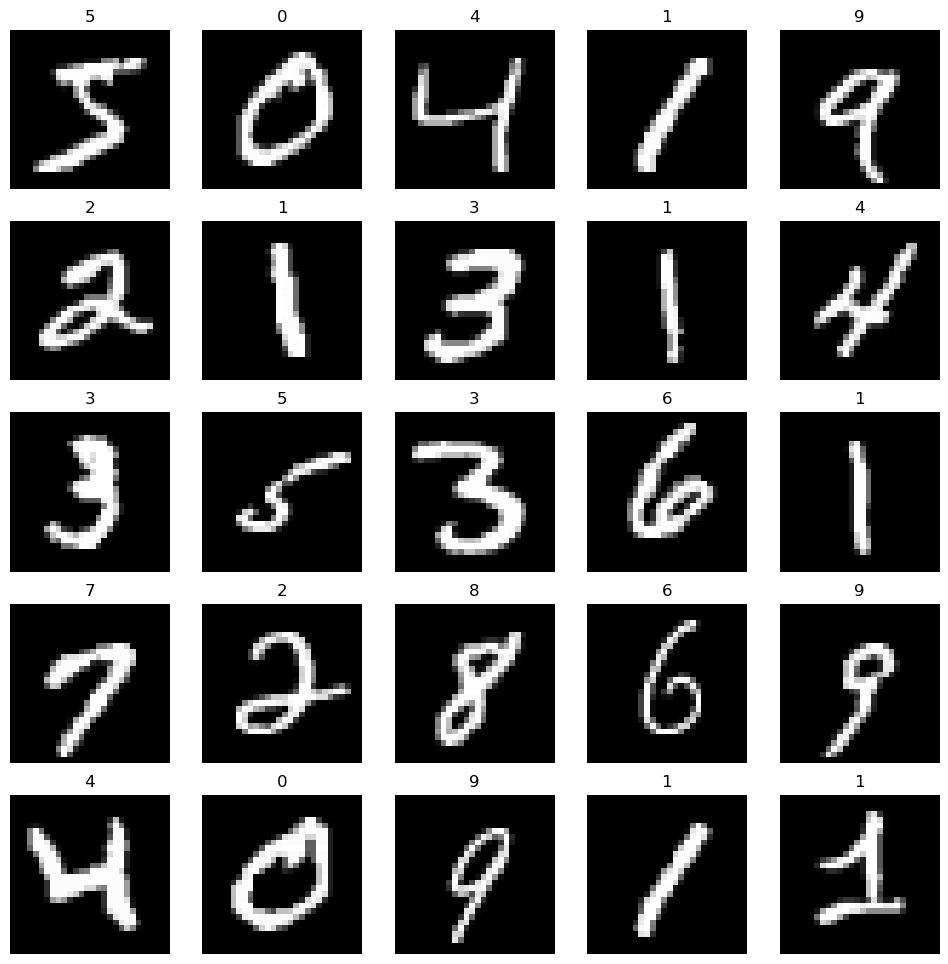

In [54]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title(train_labels[i])
    ax.axis('off')
plt.show()

## Preprocessing

In [55]:
np.min(train_images), np.max(train_images)

(0, 255)

In [56]:
train_images = train_images / 255
test_images = test_images / 255

In [57]:
np.min(train_images), np.max(train_images)

(0.0, 1.0)

## Models

### Baseline - Dense

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(28 * 28, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax(),
])

In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 784)               615440    
                                                                 
 dense_13 (Dense)            (None, 10)                7850      
                                                                 
 softmax_6 (Softmax)         (None, 10)                0         
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [61]:
model.fit(train_images, train_labels,epochs=10,batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1930 - accuracy: 0.9427 - val_loss: 0.0978 - val_accuracy: 0.9706
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 0.0753 - val_accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0492 - accuracy: 0.9847 - val_loss: 0.0786 - val_accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0350 - accuracy: 0.9886 - val_loss: 0.0657 - val_accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0766 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0724 - val_accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0775 - val_accur

In [62]:
loss, acc = model.evaluate(test_images, test_labels)
acc

313/313 [==============================] - 11s 34ms/step - loss: 0.0939 - accuracy: 0.9789


0.9789000153541565

### Dense with Dropout

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(28 * 28, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax(),
    tf.keras.layers.Dropout(0.2),
])

In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 784)               615440    
                                                                 
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 softmax_7 (Softmax)         (None, 10)                0         
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [66]:
model.fit(train_images, train_labels,epochs=10,batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 74s 37ms/step - loss: 1.3781 - accuracy: 0.7405 - val_loss: 0.3361 - val_accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.9100 - accuracy: 0.7709 - val_loss: 0.2926 - val_accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.7834 - accuracy: 0.7812 - val_loss: 0.2324 - val_accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.7259 - accuracy: 0.7838 - val_loss: 0.2496 - val_accuracy: 0.9700
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.6721 - accuracy: 0.7891 - val_loss: 0.2157 - val_accuracy: 0.9750
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.6532 - accuracy: 0.7882 - val_loss: 0.2071 - val_accuracy: 0.9756
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.6400 - accuracy: 0.7869 - val_loss: 0.2019 -

In [67]:
loss, acc = model.evaluate(test_images, test_labels)
acc

313/313 [==============================] - 13s 43ms/step - loss: 0.1740 - accuracy: 0.9813


0.9812999963760376

### Conv - 1 layer

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28,28,1),input_shape=(28, 28)),
    tf.keras.layers.Conv2D(4,2,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax(),
])

In [69]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 4)         20        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 4)        0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                      

In [70]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [71]:
model.fit(train_images, train_labels,epochs=10,batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 99s 50ms/step - loss: 0.2760 - accuracy: 0.9186 - val_loss: 0.1377 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1231 - accuracy: 0.9625 - val_loss: 0.1109 - val_accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0880 - accuracy: 0.9728 - val_loss: 0.0938 - val_accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0677 - accuracy: 0.9790 - val_loss: 0.0864 - val_accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.0846 - val_accuracy: 0.9750
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.0821 - val_accuracy: 0.9748
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0792 - val_ac

In [72]:
loss, acc = model.evaluate(test_images, test_labels)
acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0829 - accuracy: 0.9764


0.9764000177383423

### Conv - 2 layers

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28,28,1),input_shape=(28, 28)),
    tf.keras.layers.Conv2D(4,2,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(8,2,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax(),
])

In [74]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 4)         20        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 4)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 8)         136       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 392)              

In [75]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [76]:
model.fit(train_images, train_labels,epochs=10,batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2862 - accuracy: 0.9160 - val_loss: 0.1024 - val_accuracy: 0.9702
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0988 - accuracy: 0.9695 - val_loss: 0.0769 - val_accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0714 - accuracy: 0.9773 - val_loss: 0.0689 - val_accuracy: 0.9788
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0499 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.0452 - val_accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0443 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0505 - val_ac

In [77]:
loss, acc = model.evaluate(test_images, test_labels)
acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0705 - accuracy: 0.9784


0.9783999919891357

### Conv - 2 layers, more filters, with dropout

In [78]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28,28,1),input_shape=(28, 28)),
    tf.keras.layers.Conv2D(16,2,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,2,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax(),
    tf.keras.layers.Dropout(0.2),
])

In [79]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 1568)            

In [80]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [81]:
history = model.fit(train_images, train_labels,epochs=10,batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.2387 - accuracy: 0.7471 - val_loss: 0.2694 - val_accuracy: 0.9650
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7876 - accuracy: 0.7778 - val_loss: 0.2019 - val_accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7113 - accuracy: 0.7859 - val_loss: 0.1949 - val_accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6625 - accuracy: 0.7869 - val_loss: 0.1911 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6282 - accuracy: 0.7922 - val_loss: 0.1440 - val_accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6083 - accuracy: 0.7911 - val_loss: 0.1382 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6050 - accuracy: 0.7890 - val_loss: 0.1665 - val_ac

In [82]:
loss, acc = model.evaluate(test_images, test_labels)
acc

313/313 [==============================] - 1s 4ms/step - loss: 0.1277 - accuracy: 0.9863


0.986299991607666

### Training process

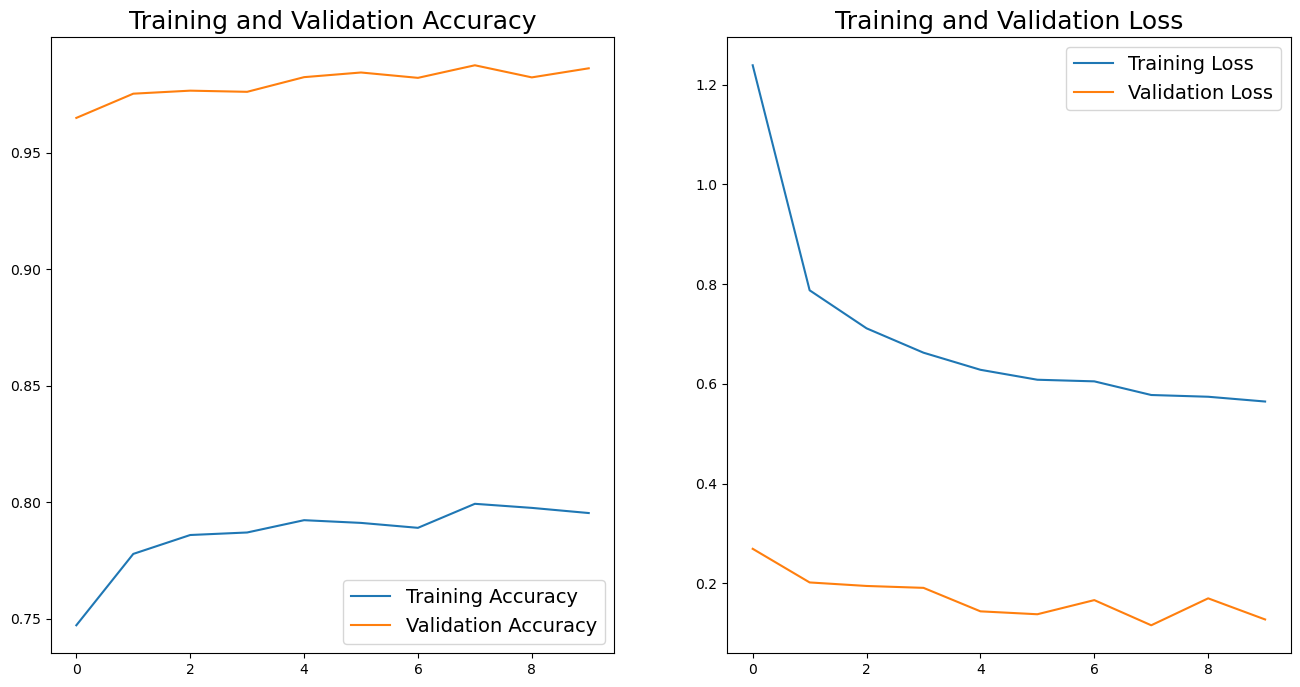

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right',fontsize=14)
plt.title('Training and Validation Accuracy',fontsize=18)

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right',fontsize=14)
plt.title('Training and Validation Loss',fontsize=18)
plt.show()

### Testing the model

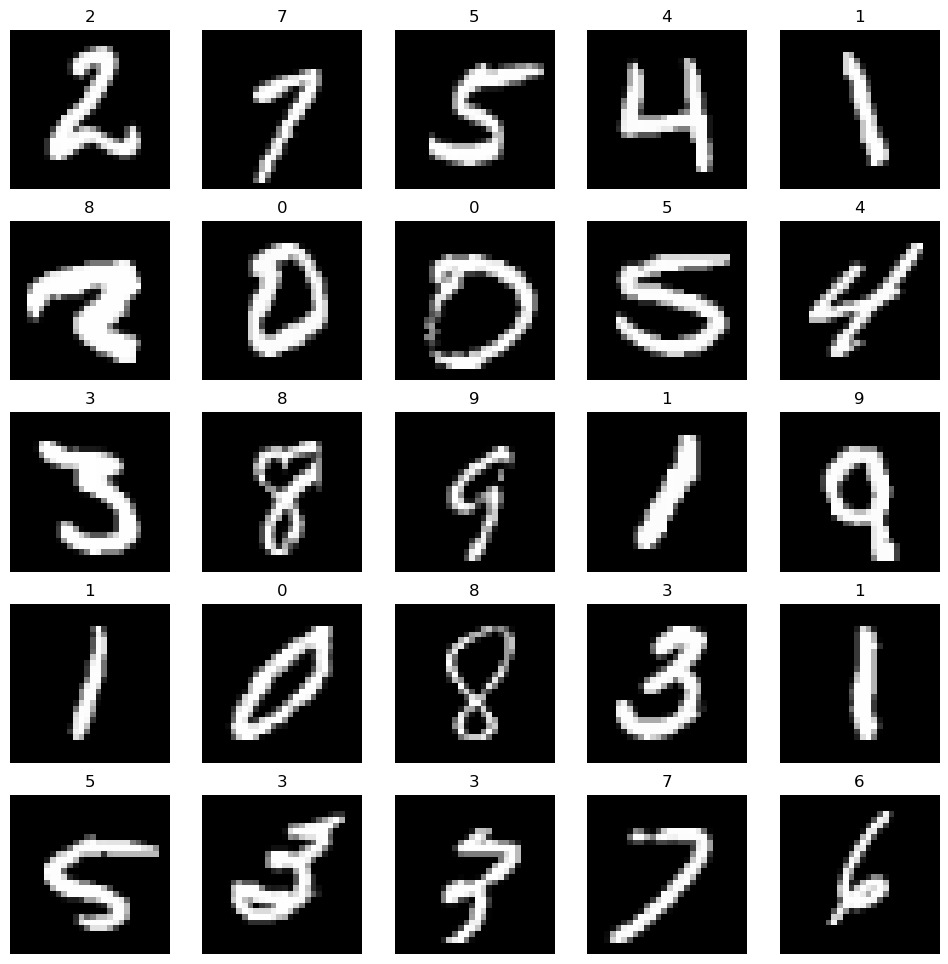

In [84]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
for ax in axes.flat:
    i = random.randint(0, len(test_labels))
    image = test_images[i]
    image_batch = tf.expand_dims(image, 0)
    pred = model.predict(image_batch,verbose=0)
    ax.imshow(image, cmap='gray')
    ax.set_title(np.argmax(pred))
    ax.axis('off')
plt.show()

## Best model in model.py